In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use("pdf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
# read csv files
df_cap = pd.read_csv('../../Data/Downloaded/post_cap.csv')
df_GDP = pd.read_csv('../../Data/Downloaded/post_GDP.csv')
df_cns = pd.read_csv('../../Data/Downloaded/post_real_cns.csv')

In [3]:
# parameters
α_KA  = 0.15
α_LA  = 0.55
α_KM  = 0.6
α_LM  = 0.4
η     = 0.15
γ_pre = 60
#γ_post = 76.4
γ_post = 68.8 
δ     = 0.05
β     = 0.96

In [4]:
# calculation of intertemporal wedge requires cMt/cMt+1
df_cns['c_M_t'] = df_cns['real_non_food_cns']
df_cns['c_M_t+1'] = df_cns['real_non_food_cns'].shift(-1)

In [5]:
df_cns['c_M_t/c_M_t+1'] = df_cns['c_M_t'] / df_cns['c_M_t+1']

In [6]:
# change d type for merge
df_cap['year_jpn'] = df_cap['year_jpn'].astype(str)
df_GDP['year_jpn'] = df_GDP['year_jpn'].astype(str)

In [7]:
# divide by 1000 to make the unit common. 
denom = 1000

columns = ['tot_cap', 'prm_cap', 'non_prm_cap']
for column in columns:
    df_cap[column] = df_cap[column] / denom

In [8]:
df_GDP_cap = pd.merge(df_GDP[['year_jpn', 'year_wst', 'non_prm_GDP']],
                      df_cap[['year_jpn', 'non_prm_cap']], on = 'year_jpn')

In [9]:
df_GDP_cap['F_KM'] = α_KM * df_GDP_cap['non_prm_GDP'] / df_GDP_cap['non_prm_cap']

In [10]:
# real return on capital
# note that we need α_KM * Y_M_t+1/K_M_t
df_GDP_cap['real_roc'] = 1 - δ + df_GDP_cap['F_KM'].shift(-1)

In [11]:
df_merged = pd.merge(df_GDP_cap[['year_wst', 'real_roc']], 
                     df_cns[['year_wst', 'c_M_t/c_M_t+1']],
                    on = 'year_wst')

In [12]:
df_merged['intertemporal_wedge'] = β * df_merged['c_M_t/c_M_t+1'] * df_merged['real_roc']

In [13]:
df_merged['intertemporal_wedge-1'] = df_merged['intertemporal_wedge'] - 1

In [14]:
df_merged.to_csv('../../Data/Results/post_inter_w.csv', index= False)

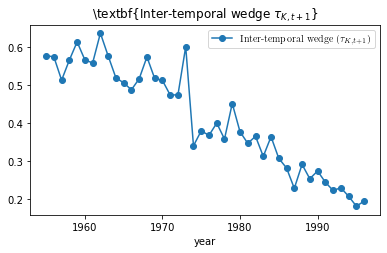

In [15]:
fig, ax = plt.subplots()

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.rc('pgf', texsystem = 'pdflatex')
df_merged.plot(x = 'year_wst', y = 'intertemporal_wedge-1', 
               label = r'Inter-temporal wedge ($\tau_{K,t+1}$)', 
               marker = 'o',
               ax = ax)
plt.xlabel('year')
fig.set_size_inches(w=6.26894, h=3.5)
plt.title(r'\textbf{Inter-temporal wedge $\tau_{K,t+1}$}')
plt.savefig('../../Graphs/post_inter_temporal.pgf')
plt.show()

In [16]:
df_merged

,year_wst,real_roc,c_M_t/c_M_t+1,intertemporal_wedge,intertemporal_wedge-1
0,1955,1.801598,0.911551,1.576558,0.576558
1,1956,1.841600,0.890019,1.573497,0.573497
2,1957,1.832003,0.859924,1.512368,0.512368
3,1958,1.836025,0.887940,1.565069,0.565069
4,1959,1.884416,0.891492,1.612744,0.612744
5,1960,1.876046,0.869240,1.565506,0.565506
6,1961,1.835684,0.883788,1.557461,0.557461
7,1962,1.800229,0.946376,1.635546,0.635546
8,1963,1.783928,0.920209,1.575924,0.575924
9,1964,1.733756,0.912281,1.518405,0.518405


In [17]:
df_merged.loc[0:15]['intertemporal_wedge-1'].mean()

0.5502163273945633